In [1]:
import json
import requests
import pandas as pd
import os

In [2]:
from datetime import date
 
today = date.today()
topic='self-driving-cars'
 
print(today)
count = 0
#url = 'https://medium.com/'+topic+'?format=json'
url = 'https://medium.com/topic/'+topic+'?format=json'
#url = 'https://'+topic+'.medium.com/?format=json'
#print(url)
p = requests.get(url)
pop=json.loads(p.content[16:])
 
f=open(str(today)+"-"+str(count)+'-'+topic+".json",'w')
json.dump(pop,f)
to = pop['payload']['paging']['next']['to']
next = pop['payload']['paging']['path']
 
##################
end = False
while end == False:
  count = count+1
  if count > 5: break
  url = 'https://medium.com'+str(next)+'?format=json&to='+to
  #url = 'https://medium.com/topic/popular?format=json&to='+to
  print(url)
  p = requests.get(url)
  pop=json.loads(p.content[16:])
  if to == pop['payload']['paging']['next']['to']:
    end = True
  
  to = pop['payload']['paging']['next']['to']
  f=open(str(today)+"-"+str(count)+'-'+topic+".json",'w')
  json.dump(pop,f)
 
  to = pop['payload']['paging']['next']['to']
  next = pop['payload']['paging']['path']

2020-11-30
https://medium.com/_/api/topics/179fe16ad88/stream?format=json&to=1605637348335
https://medium.com/_/api/topics/179fe16ad88/stream?format=json&to=1603772953625


In [3]:
files = os.listdir()
filestoday = []
for i in files:
  if str(today) in i:
    filestoday.append(i)
 
filestoday

['2020-11-30-0-self-driving-cars.json',
 '2020-11-30-1-self-driving-cars.json',
 '2020-11-30-2-self-driving-cars.json']

In [4]:
count=1
topics=""
tags=""
 
df = pd.DataFrame(columns=['Title','Subtitle','Date','Creator','Claps','WordCount'])
 
 
for i in filestoday:
  f=open(i)
  pop=json.loads(f.read())
 
 
  print(pop['payload']['paging']['path'])
 
  print(pop['payload']['references']['Post'])
  
 
  posts=(pop['payload']['references']['Post'])
  for i in posts:
    print("Title: ",posts[i]['title'])
    print("Subtitle: ",posts[i]['virtuals']['subtitle'])
    print("Date: ",posts[i]['latestPublishedAt'])
    print("Creator: ",posts[i]['creatorId'])
    #print(posts[i]['virtuals'])  
    print("Claps: ",posts[i]['virtuals']['totalClapCount'])
    print("Word count: ",posts[i]['virtuals']['wordCount'])
    print("Image count: ",posts[i]['virtuals']['imageCount'])
    print("Reading time: ",posts[i]['virtuals']['readingTime'])
 
    
 
    for t in posts[i]['virtuals']['topics']:
      print ("Topic:",t['name'])
      topics=topics+", "+t['name']
 
    for t in posts[i]['virtuals']['tags']:
      print ("Tag:",t['name'])
      tags=tags+", "+t['name']
 
    print(count)
    count=count+1
 
    row = {'Title':posts[i]['title'],
           'Subtitle':posts[i]['virtuals']['subtitle'],
           'Date':posts[i]['latestPublishedAt'],
           'Creator':posts[i]['creatorId'],
           'Claps':posts[i]['virtuals']['totalClapCount'],
           'WordCount':posts[i]['virtuals']['wordCount'],
           'Image count':posts[i]['virtuals']['imageCount'],
           'ReadingTime':posts[i]['virtuals']['readingTime'],
           'Topics':topics,
           'Tags':tags
           }
    df = df.append(row,ignore_index=True)
 
 
df

/_/api/topics/179fe16ad88/stream
{'367c7b53523d': {'id': '367c7b53523d', 'versionId': '20536b048792', 'creatorId': '4fae13346549', 'homeCollectionId': 'f5af2b715248', 'title': 'Tesla’s Full Self Driving Beta Has Changed the Game', 'detectedLanguage': 'en', 'latestVersion': '20536b048792', 'latestPublishedVersion': '20536b048792', 'hasUnpublishedEdits': False, 'latestRev': 782, 'createdAt': 1604305441206, 'updatedAt': 1604440679973, 'acceptedAt': 0, 'firstPublishedAt': 1604395028356, 'latestPublishedAt': 1604433965621, 'vote': False, 'experimentalCss': '', 'displayAuthor': '', 'content': {'subtitle': 'It’s the Quantum Leap that Elon Musk Promised', 'postDisplay': {'coverless': True}}, 'virtuals': {'statusForCollection': 'APPROVED', 'allowNotes': True, 'previewImage': {'imageId': '0*1lQIq4qEfeHQLgMm.jpg', 'filter': '', 'backgroundSize': '', 'originalWidth': 1004, 'originalHeight': 555, 'strategy': 'resample', 'height': 0, 'width': 0}, 'wordCount': 1463, 'imageCount': 1, 'readingTime': 5.

,Title,Subtitle,Date,Creator,Claps,WordCount,Image count,ReadingTime,Tags,Topics
0,Tesla’s Full Self Driving Beta Has Changed the...,It’s the Quantum Leap that Elon Musk Promised,1604433965621,4fae13346549,526,1463,1.0,5.720755,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology"
1,Deep Learning-based Object Detection in Crowde...,A review with a special focus on autonomous dr...,1606673164450,d875946648f7,55,2239,10.0,9.699057,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
2,Full Self Driving Is Possible With Existing Te...,Here’s everything that the car can see at junc...,1606235932417,4fae13346549,122,929,4.0,4.205660,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
3,Introducing Marker’s New Blog on the Future of...,"Dear Readers,",1605617180812,6425b2ce1ee1,256,419,1.0,1.781132,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
4,An Introduction to Autonomous Vehicles,Autonomous vehicles have long lived in our ima...,1606146648707,159cf1feb0b7,42,2779,6.0,11.436792,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
5,Self-Driving Cars 2020 and beyond,In 2020 we’ve seen self-driving cars taking a ...,1606204029090,1d336ff69f91,2,6815,1.0,25.916981,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
6,Autonomous Driving Is Still a Distant Dream,Great strides have been taken toward the devel...,1605896705526,529888e86861,150,2109,3.0,8.508491,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
7,Autonomous Driving Dataset Visualization with ...,Exploring the Lyft Prediction Dataset with a n...,1605761037739,97f2c07bb869,28,4086,21.0,17.218868,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
8,Introduction to Sensor Fusion for Self Driving...,A Basic introduction to RADAR and LIDAR along ...,1605796483304,377b707dee9,34,1029,1.0,4.083019,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
9,Autonomous Cars: A Smart Cities Answer to COVI...,Of all the circumstances that we might have im...,1605302723212,4e160304ccd0,35,1381,2.0,5.594654,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."


In [5]:
print(df.keys())
df.sort_values(by=['Claps'],ascending=False)[0:20]


Index(['Title', 'Subtitle', 'Date', 'Creator', 'Claps', 'WordCount',
       'Image count', 'ReadingTime', 'Tags', 'Topics'],
      dtype='object')


,Title,Subtitle,Date,Creator,Claps,WordCount,Image count,ReadingTime,Tags,Topics
0,Tesla’s Full Self Driving Beta Has Changed the...,It’s the Quantum Leap that Elon Musk Promised,1604433965621,4fae13346549,526,1463,1.0,5.720755,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology"
3,Introducing Marker’s New Blog on the Future of...,"Dear Readers,",1605617180812,6425b2ce1ee1,256,419,1.0,1.781132,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
11,How Insect Brains Inspire Machine Learning and...,From insect-inspired autonomous vehicles and c...,1604156606276,71fb8c6e7cce,188,1015,3.0,4.380189,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
19,How Insect Brains Inspire Machine Learning and...,From insect-inspired autonomous vehicles and c...,1604156606276,71fb8c6e7cce,188,1015,3.0,4.380189,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
22,Virtual Validation: A Scalable Solution to Tes...,"By: Robert Morgan, Engineering Director and Ma...",1603818089676,d6f431a02b8c,157,1104,3.0,4.716038,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
14,Virtual Validation: A Scalable Solution to Tes...,"By: Robert Morgan, Engineering Director and Ma...",1603818089676,d6f431a02b8c,157,1104,3.0,4.716038,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
21,Introduction to Deep Learning for Self Driving...,Foundational Concepts in the field of Deep Lea...,1604992931751,377b707dee9,152,1733,3.0,7.089623,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
13,Introduction to Deep Learning for Self Driving...,Foundational Concepts in the field of Deep Lea...,1604992931751,377b707dee9,152,1733,3.0,7.089623,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
6,Autonomous Driving Is Still a Distant Dream,Great strides have been taken toward the devel...,1605896705526,529888e86861,150,2109,3.0,8.508491,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."
15,"Automated Cars Are Here (oh, wait)",We were promised 10 million self-driving cars ...,1603864421499,943fd53708c2,135,733,1.0,2.966038,", Machine Learning, Technology, Tesla, Data Sc...",", Self-Driving Cars, Programming, Technology, ..."


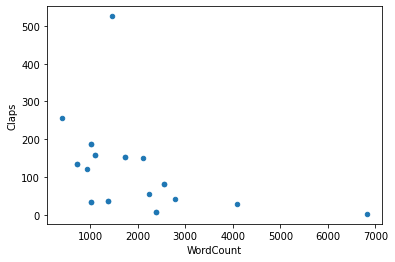

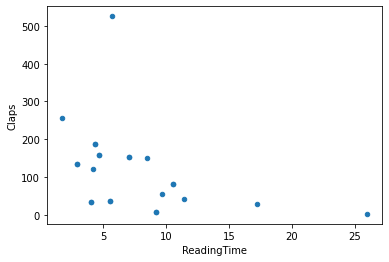

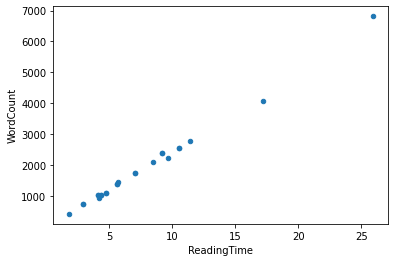

In [6]:
df.plot.scatter('WordCount','Claps')
df.plot.scatter('ReadingTime','Claps')
df.plot.scatter('ReadingTime','WordCount')

12
Self-Driving Cars          24
Artificial Intelligence    11
Technology                 11
Machine Learning           10
Future                      7
Data Science                6
Programming                 4
Psychology                  2
Transportation              1
Business                    1
Media                       1
                            1
dtype: int64


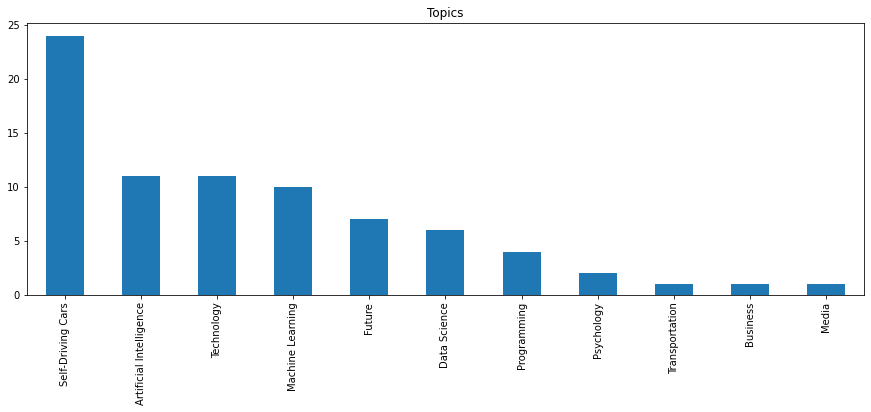

In [7]:
 
counts = dict()
words = topics.split(", ")
 
for word in words:
  if word in counts:
    counts[word] += 1
  else:
    counts[word] = 1
 
counts
 
t = pd.Series(counts).sort_values(ascending=False)
print(len(t))
print(t)
t[:-1].plot.bar(figsize=(15,5),title="Topics");

36
Self Driving Cars          14
Machine Learning           11
Technology                  9
Artificial Intelligence     9
Data Science                8
Autonomous Cars             8
Autonomous Vehicles         8
Deep Learning               7
Tesla                       5
AI                          3
Innovation                  3
Future                      3
Cars                        2
Lifestyle                   2
Pandemic                    2
Testing                     2
Neural Networks             2
Science                     2
Driverless Cars             2
Urban Planning              2
dtype: int64


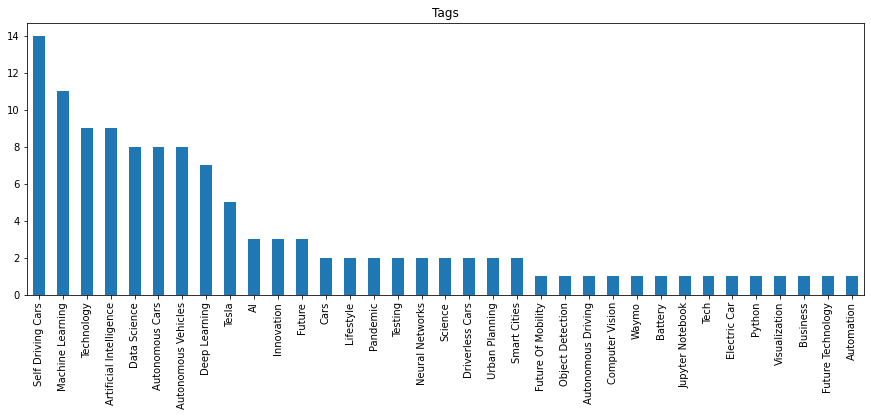

In [8]:
 
counts = dict()
words = tags.split(", ")
 
for word in words:
  if word in counts:
    counts[word] += 1
  else:
    counts[word] = 1
 
counts
t = pd.Series(counts).sort_values(ascending=False)
print(len(t))
print(t[:20])
t[:-1].plot.bar(figsize=(15,5),title="Tags");

In [9]:
"""
df = pd.DataFrame(columns=['a','b'])
#df=pd.DataFrame()
df = df.append({'a':1,'b':2},ignore_index=True)
df = df.append({'a':3,'b':4},ignore_index=True)
df
"""

"\ndf = pd.DataFrame(columns=['a','b'])\n#df=pd.DataFrame()\ndf = df.append({'a':1,'b':2},ignore_index=True)\ndf = df.append({'a':3,'b':4},ignore_index=True)\ndf\n"